Read the raw files first

In [376]:
import pandas as pd
pd.set_option("display.max_columns", 85)
movies_df = pd.read_csv("data/movies_metadata.csv")
credits_df = pd.read_csv("data/credits.csv")
keywords_df = pd.read_csv("data/keywords.csv")
links_sm_df = pd.read_csv("data/links_small.csv")
links_df = pd.read_csv("data/links.csv")
ratings_sm_df = pd.read_csv("data/ratings_small.csv")
ratings_df = pd.read_csv("data/ratings.csv")
tmdb_credits_df = pd.read_csv("data/tmdb_5000_credits.csv")
tmdb_movies_df = pd.read_csv("data/tmdb_5000_movies.csv")

/var/folders/nq/ln_gwthx2kb0qfqrxc4zszmr0000gn/T/ipykernel_87228/782814067.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("data/movies_metadata.csv")


### Data cleanup: 
- movies_df
    - reformat ['imdb_id']: remove leading 'tt0' from string.
    - dropna (id)
    - remove dups (id)
    - make id the index
    
 


links_df.dropna(axis='index', how='all', subset=['tmdbId'], inplace=True)
print(links_df.shape)

In [291]:
# strip 'tt0' from the column  
movies_df['imdb_id'].str.strip('tt0')
movies_df['imdb_id']

0        tt0114709
1        tt0113497
2        tt0113228
3        tt0114885
4        tt0113041
           ...    
45461    tt6209470
45462    tt2028550
45463    tt0303758
45464    tt0008536
45465    tt6980792
Name: imdb_id, Length: 45466, dtype: object

- links_df
    - drop na
    - update ['tmdbId'] to remove the decimal and convert to str
    - rename ['movieId'] to ['movie_id']
    - rename ['imdbId'] to ['imdb_id']
    - rename ['tmdbId'] to ['id'] 

In [405]:
print(links_df.shape)
links_df.head()

(45843, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [407]:
# drop na when tmdbId is null
links_df.dropna(axis='index', how='all', subset=['tmdbId'], inplace=True)
print(links_df.shape)

# remove the decimal in tmdbId column and update dtype to string
links_df['tmdbId'] = links_df['tmdbId'].astype(str).apply(lambda x: x.replace('.0',''))


# update column name to be consistent with movies_df
links_df.rename(columns={"movieId" : "movie_id", "imdbId": "imdb_id", "tmdbId": "id"}, inplace=True)
links_df

(45624, 3)


,movie_id,imdb_id,id
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862
...,...,...,...
45838,176269,6209470,439050
45839,176271,2028550,111109
45840,176273,303758,67758
45841,176275,8536,227506


In [361]:
#convert all to id fields to string
links_df['movie_id'] = links_df['movie_id'].astype(str)
links_df['imdb_id'] = links_df['imdb_id'].astype(str)
links_df['id'] = links_df['id'].astype(str)
links_df.dtypes

movie_id    object
imdb_id     object
id          object
dtype: object

- links_sm_df
    - drop na if no value in ['tmdbId']
    - update ['tmdbId'] to remove the decimal and convert to str
    - rename ['movieId'] to ['movie_id']
    - rename ['imdbId'] to ['imdb_id']
    - rename ['tmdbId'] to ['id']
    - convert all ID fields to string 

In [408]:
# drop na if no value in ['tmdbId']
links_sm_df.dropna(axis='index', how='all', subset=['tmdbId'], inplace=True)

# remove the decimal in tmdbId column and update dtype to string
links_sm_df['tmdbId'] = links_sm_df['tmdbId'].astype(str).apply(lambda x: x.replace('.0',''))
links_sm_df['tmdbId']

# update column name to be consistent with movies_df
links_sm_df.rename(columns={"movieId" : "movie_id", "imdbId": "imdb_id", "tmdbId": "id"}, inplace=True)
links_sm_df


,movie_id,imdb_id,id
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862
...,...,...,...
9120,162672,3859980,402672
9121,163056,4262980,315011
9122,163949,2531318,391698
9123,164977,27660,137608


In [409]:
#convert all to id fields to string
links_sm_df['movie_id'] = links_sm_df['movie_id'].astype(str)
links_sm_df['imdb_id'] = links_sm_df['imdb_id'].astype(str)
links_sm_df.dtypes

movie_id    object
imdb_id     object
id          object
dtype: object

2009-12-14 02:52:59


- tmdb_credits_df
    - update update ['movie_id'] to string
    - update ['movie_id'] to ['id']

In [414]:
#update ['movie_id'] to string
tmdb_credits_df['movie_id'] = tmdb_credits_df['movie_id'].astype(str)

#update ['movie_id'] to ['id']
tmdb_credits_df.rename(columns={"movie_id" : "id"}, inplace=True)
tmdb_credits_df

KeyError: 'movie_id'

- tmdb_movies_df
    - update ['id'] from int to str

In [412]:
# update ['id'] from int to str
tmdb_movies_df.id = tmdb_movies_df.id.astype(str)
tmdb_movies_df.id.dtype

dtype('O')

- keywords_df
    - update ['id'] from int to str

In [416]:
# update ['id'] from int to str
keywords_df.id = keywords_df.id.astype(str)
keywords_df.id.dtype


dtype('O')

- credits_df
    - update ['id'] from int to str

In [417]:
# update ['id'] from int to str
credits_df.id = credits_df.id.astype(str)
credits_df.id.dtype

dtype('O')

- ratings_df
    - rename ['userId] to ['user_id']
    - rename ['movieId] to ['movie_id']
    - convert ['user_id'] and ['movie_id'] to string
    - convert unix timestamp to python timestamp

In [378]:
ratings_df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [380]:

##convert to string 
ratings_df['movieId'] = ratings_df['movieId'].astype(str)
ratings_df.userId = ratings_df.userId.astype(str)
ratings_df.userId

#rename columns
ratings_df.rename(columns={"userId" : "user_id", "movieId" : "movie_id"}, inplace=True)
ratings_df.dtypes

user_id       object
movie_id      object
rating       float64
timestamp      int64
dtype: object

In [388]:
# convert unix time 
import datetime
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit = 's')
ratings_df['timestamp']

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

- ratings_sm_df
    - rename ['userId] to ['user_id']
    - rename ['movieId] to ['movie_id']
    - convert ['user_id'] and ['movie_id'] to string
    - convert unix timestamp to python timestamp

In [389]:
ratings_sm_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [390]:
ratings_sm_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [395]:
##convert to string 
ratings_sm_df['movieId'] = ratings_sm_df['movieId'].astype(str)
ratings_sm_df.userId = ratings_sm_df.userId.astype(str)
ratings_sm_df.dtypes

#rename columns
ratings_sm_df.rename(columns={"userId" : "user_id", "movieId" : "movie_id"}, inplace=True)
ratings_sm_df.dtypes

user_id       object
movie_id      object
rating       float64
timestamp      int64
dtype: object

In [396]:
# convert unix time 
import datetime
ratings_sm_df['timestamp'] = pd.to_datetime(ratings_sm_df['timestamp'], unit = 's')
ratings_sm_df['timestamp']

0        2009-12-14 02:52:24
1        2009-12-14 02:52:59
2        2009-12-14 02:53:02
3        2009-12-14 02:53:05
4        2009-12-14 02:53:25
                 ...        
99999    2003-10-08 02:16:10
100000   2003-10-03 02:46:41
100001   2003-12-09 03:26:03
100002   2003-12-09 14:21:03
100003   2004-01-22 15:18:44
Name: timestamp, Length: 100004, dtype: datetime64[ns]

Exploratory Data Analysis
Step 1: Data Understanding

In [459]:
movies_df = pd.read_csv("data/movies_metadata.csv")
movies_df.head(10)

/var/folders/nq/ln_gwthx2kb0qfqrxc4zszmr0000gn/T/ipykernel_87228/3978639507.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("data/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,To

In [422]:
print(movies_df.shape)
print(movies_df.columns)

(45466, 24)
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [421]:
movies_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [425]:
movies_df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Step 2: Data Preparation

- Copy DF with only columns need
- update dtypes 

In [481]:
#copy a new df
movies_df = movies_df[['adult', 'budget', 'genres', 'id',
       'imdb_id', 'original_language', 'original_title',
       'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime','vote_average', 'vote_count']].copy()

In [464]:
#update dtype for columns
#budget, popularity - float
#release_date - datetime
#NOTE: there are some invalid string data in ['budget'] and ['popularity']. Use method error='coerce' to set invalid parsing as NaN.


movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors = 'coerce')
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors = 'coerce')


In [476]:
import datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

In [483]:
#confirm the dtypes are now correctly updated
movies_df.dtypes

adult                           object
budget                         float64
genres                          object
id                              object
imdb_id                         object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
vote_average                   float64
vote_count                     float64
dtype: object

In [482]:
# inspect the data again to make sure we did not lose the values in the series (eg. date)
movies_df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,7.7,5415.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,6.9,2413.0
2,False,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,6.5,92.0
3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,6.1,34.0
4,False,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,5.7,173.0


Rename columns

In [484]:
movies_df.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'vote_average', 'vote_count'],
      dtype='object')

In [487]:
movies_df = movies_df.rename(columns={'adult': 'Adult',
                          'budget': 'Budget',
                          'genres': 'Genres',
                          'id': 'Id',
                          'imdb_id': 'Imdb_id',
                          'original_language': 'Original_Language',
                          'original_title': 'Original_Title',
                          'popularity': 'Popularity',
                          'production_companies': 'Production_Companies',
                          'production_countries': 'Production_Countries',
                          'release_date': 'Release_Date',
                          'revenue': 'Revenue',
                          'runtime': 'Runtime',
                          'vote_average': 'Vote_Average',
                          'vote_count': 'Vote_Count'})

In [489]:
#verify rename is successfully done
movies_df.head()

,Adult,Budget,Genres,Id,Imdb_id,Original_Language,Original_Title,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Vote_Average,Vote_Count
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,7.7,5415.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,6.9,2413.0
2,False,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,6.5,92.0
3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,6.1,34.0
4,False,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,5.7,173.0


Null Values & Duplications
- do missing values exist, and how often?

In [490]:
# Null values table
movies_df.isna().sum()

Adult                     0
Budget                    3
Genres                    0
Id                        0
Imdb_id                  17
Original_Language        11
Original_Title            0
Popularity                6
Production_Companies      3
Production_Countries      3
Release_Date             90
Revenue                   6
Runtime                 263
Vote_Average              6
Vote_Count                6
dtype: int64

In [493]:
# to capture duplicated rows based on ['Id']
movies_df.loc[movies_df.duplicated(subset=['Id'])]

,Adult,Budget,Genres,Id,Imdb_id,Original_Language,Original_Title,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Vote_Average,Vote_Count
1465,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",105045,tt0111613,de,Das Versprechen,0.122178,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,5.0,1.0
9165,False,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",5511,tt0062229,fr,Le Samouraï,9.091288,"[{'name': 'Fida cinematografica', 'id': 73}, {...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1967-10-25,39481.0,105.0,7.9,187.0
9327,False,0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",23305,tt0295682,en,The Warrior,1.967992,"[{'name': 'Filmfour', 'id': 6705}]","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2001-09-23,0.0,86.0,6.3,15.0
12066,False,1600000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",14788,tt0454792,en,Bubble,3.008299,"[{'name': 'Magnolia Pictures', 'id': 1030}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2005-09-03,0.0,73.0,6.4,36.0
13375,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",141971,tt1180333,fi,Blackout,0.411949,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,6.7,3.0
15074,False,4.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",22649,tt0022879,en,A Farewell to Arms,2.411191,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1932-12-08,25.0,89.0,6.2,29.0
15765,False,2500.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",13209,tt0499537,fa,Offside,1.529879,"[{'name': 'Jafar Panahi Film Productions', 'id...","[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2006-05-26,0.0,93.0,6.7,27.0
16764,False,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",141971,tt1180333,fi,Blackout,0.411949,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,6.7,3.0
20843,False,40000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",77221,tt1701210,en,Black Gold,6.475665,"[{'name': 'France 2 Cinéma', 'id': 83}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2011-12-21,5446000.0,130.0,5.9,77.0
20899,False,0.0,"[{'id': 18, 'name': 'Drama'}]",109962,tt0082992,en,Rich and Famous,10.396878,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",1981-09-23,0.0,115.0,4.9,7.0


In [501]:
#inspect the duplicated rows
# notes: inspected a few and they are all identical
movies_df.query('Id == "4912"')

,Adult,Budget,Genres,Id,Imdb_id,Original_Language,Original_Title,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Vote_Average,Vote_Count
5865,False,30000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",4912,tt0270288,en,Confessions of a Dangerous Mind,11.331072,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805.0,113.0,6.6,281.0
33826,False,30000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",4912,tt0270288,en,Confessions of a Dangerous Mind,7.645827,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805.0,113.0,6.6,281.0


In [514]:
# 17 rows are duplicated. add ~ to exclude the duplicated rows in our df
movies_df = movies_df.loc[~movies_df.duplicated(subset=['Id', 'Popularity', 'Original_Title'])].reset_index(drop=True).copy()

In [515]:
#now there are less rows than the original set (17 rows less)
movies_df.shape

(45449, 15)

Step 3: Feature Understanding

In [545]:
#add a new column for Release Year
movies_df['Release_Year'] = pd.DatetimeIndex(movies_df['Release_Date']).year
movies_df[['Release_Date','Release_Year']].head()

,Release_Date,Release_Year
0,1995-10-30,1995.0
1,1995-12-15,1995.0
2,1995-12-22,1995.0
3,1995-12-22,1995.0
4,1995-02-10,1995.0


In [546]:
#remove the decimal and convert to str
movies_df['Release_Year'] = movies_df['Release_Year'].astype(str).apply(lambda x: x.replace('.0',''))

In [547]:
movies_df['Release_Year'].value_counts()

Release_Year
2014    1973
2015    1904
2013    1888
2012    1722
2011    1667
        ... 
2020       1
1887       1
1878       1
1874       1
1883       1
Name: count, Length: 136, dtype: int64

Text(0, 0.5, 'Count')

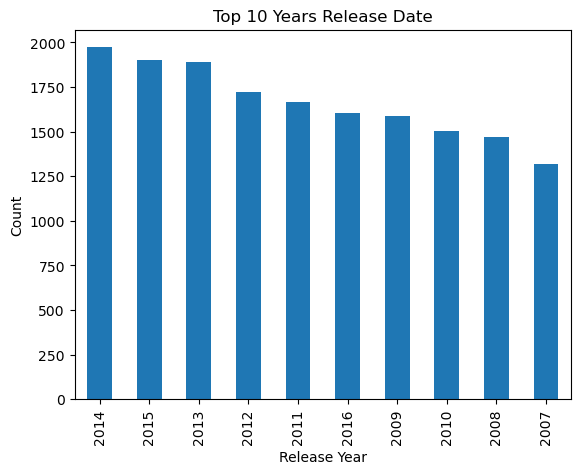

In [548]:
#Plot movie counts by top 10 Release Years
x = movies_df['Release_Year'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Release Date')

ax.set_xlabel('Release Year')
ax.set_ylabel('Count')

## NOTE TO SELF: add a new column for Release Year and replot this later

Text(0.5, 0, 'Average Votes')

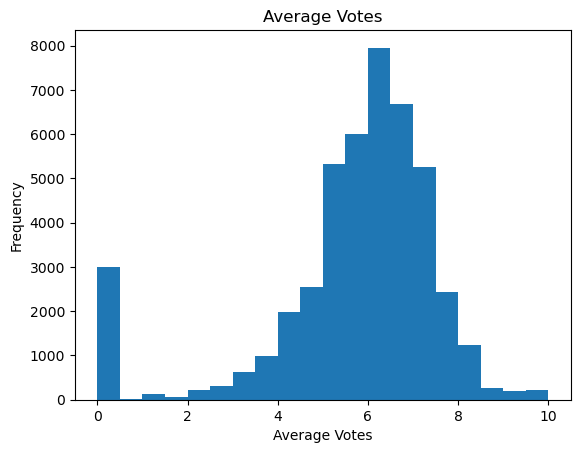

In [573]:
#Vote_Average check
ax = movies_df['Vote_Average'].plot(kind='hist', 
                               bins=20, 
                               title='Average Votes')
ax.set_xlabel('Average Votes')


Text(0.5, 0, 'Average Votes')

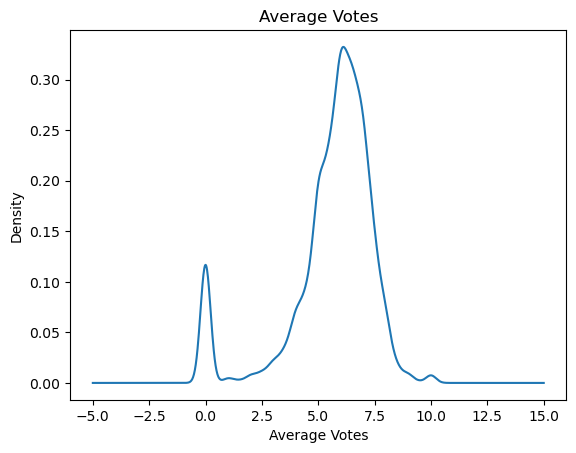

In [585]:
ax = movies_df['Vote_Average'].plot(kind='kde',  
                               title='Average Votes')
ax.set_xlabel('Average Votes')

<Axes: title={'center': 'Popularity'}, ylabel='Frequency'>

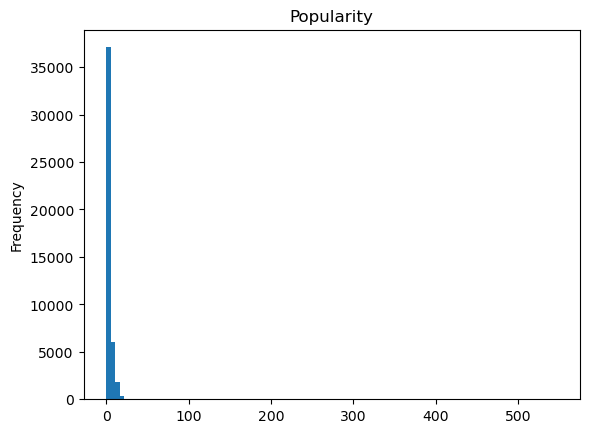

In [604]:
movies_df['Popularity'].plot(kind='hist', 
                               bins=100, 
                               title='Popularity')


In [594]:
movies_df['Revenue']

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45444            0.0
45445            0.0
45446            0.0
45447            0.0
45448            0.0
Name: Revenue, Length: 45449, dtype: float64